# Visualization

<br>



In [21]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from utils import loader
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)

In [23]:
nb_samples = x.shape[0]
nb_features = x.shape[1]
print("Training data facts\n")
print("Number of samples: {} \nNumber of features: {}".format(nb_samples, nb_features))
print("Shape of data matrix {}".format(x.shape))

Training data facts

Number of samples: 250000 
Number of features: 30
Shape of data matrix (250000, 30)


In [24]:
from utils import jet_num_handler
from utils import constant

# Cleaning the data

# Split data based on jet_num
x_split, y_split = jet_num_handler.split_by_jet_num(x, y)
undef_cols_list = []

# Find columns of undef values
for x_ in x_split:
    undef_cols = jet_num_handler.get_undef_cols_idx(x_, constant.UNDEF_VAL)
    undef_cols_list.append(undef_cols)

In [25]:
# Columnns of undef values (per jet_num)
undef_cols_list

[[4, 5, 6, 12, 23, 24, 25, 26, 27, 28], [4, 5, 6, 12, 26, 27, 28], []]

In [26]:
# Remove the undef columns per jet_num related data
new_x_split = jet_num_handler.clean_split(x_split)

In [27]:
new_x_split[0].shape

(99913, 19)

In [28]:
x_split[1][0, :]

array([ 1.60937e+02,  6.87680e+01,  1.03235e+02,  4.81460e+01,
       -9.99000e+02, -9.99000e+02, -9.99000e+02,  3.47300e+00,
        2.07800e+00,  1.25157e+02,  8.79000e-01,  1.41400e+00,
       -9.99000e+02,  4.20140e+01,  2.03900e+00, -3.01100e+00,
        3.69180e+01,  5.01000e-01,  1.03000e-01,  4.47040e+01,
       -1.91600e+00,  1.64546e+02,  1.00000e+00,  4.62260e+01,
        7.25000e-01,  1.15800e+00, -9.99000e+02, -9.99000e+02,
       -9.99000e+02,  4.62260e+01])

### Background information on the data

The data comes from proton-proton collision simulation performed in CERN. Each collision -- also known as an event -- produces a vector (a snapshot) containing the information of the collision. From each event we extract 30 important physical measures (features) that we collect into a new vector that we will use as a data point for classification. The objective is to figure out if an event contains key signatures -- such as decay patterns -- of the Higgs boson, each sample is labeled -1 if it is just background noise, and 1 if it contains signal for a Higgs boson.

Ref: (TODO add this as a reference in the 2 page document as the background paper)

https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

In [29]:
signal, noise = 1, -1
nb_signal = sum(y == signal)
nb_noise = sum(y == noise)

print("Fraction of signal in data = {0:.2f}".format(nb_signal / nb_samples))
print("Fraction of noise in data = {0:.2f}".format(nb_noise / nb_samples))

Fraction of signal in data = 0.34
Fraction of noise in data = 0.66


### Data pre processing 
#### TODO also clean the test (not only train)

It can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables.

In the following we check how many and which contan such errors

In [30]:
from utils import preprocessing as pp

In [31]:
error_threshold = -999.0

In [32]:
idx_with_error = []
idx_without_error = []

for i, val in enumerate(x):
    if np.any(val == error_threshold):
        idx_with_error.append(i)
    else:
        idx_without_error.append(i)

nb_errors = len(idx_with_error)
        
print("There are {} samples with errors".format(nb_errors))
print("That is {0:.2f}% of the train data".format(nb_errors/nb_samples*100))

There are 181886 samples with errors
That is 72.75% of the train data


In [33]:
to_replace = [(constant.UNDEF_VAL, 'most_frequent')]

x_split, y_split = pp.preprocess_jet_num(x, y, to_replace, do_normalise=False, add_bias=True)

In [47]:
group = 0
x_0, y_0 = x_split[group], y_split[group]

(99913, 20)

## Data exploration

We perform some simple PCA to check if in the leading axis the data is seperable.

Looking at the 2 leading axis shows that it is not an easy task, there is no clear sperability, while the 3 leading axis give a better picture, it is also still far from being seperable.

In [48]:
from sklearn.decomposition import PCA
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(x_0)

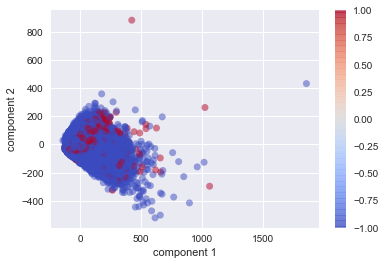

In [49]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_0, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.set_cmap('coolwarm')

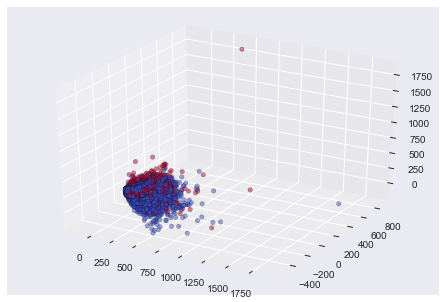

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
           c=y_0, edgecolor='none', alpha=0.5)

plt.show()

In [52]:
x_0.shape

(99913, 20)

In [51]:
projected.shape

(99913, 3)